# Make necessary imports

In [4]:
import missingno as msno
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
import pandas as pd
import os


# Customer Dataset

In [5]:
df_customer = pd.read_csv('Customers.csv', encoding='latin1')

In [6]:
df_customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [7]:
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


# Check Null 

In [8]:
df_customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

# Check Duplicate

In [9]:

# Remove duplicate rows
df_customer.duplicated().sum()

0

# Date convert to proper format

In [9]:
 
df_customer['Birthday'] = pd.to_datetime(df_customer['Birthday'], format = '%m/%d/%Y')
df_customer.head()
     

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [10]:
df_customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

 # Filling Null

In [12]:
df_customer['State Code'] = df_customer['State Code'].fillna(df_customer['State Code'].mode()[0])


In [14]:
df_customer.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [16]:
df_customer.head()


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


# Visualize

Text(0.5, 1.0, 'Gender Distribution')

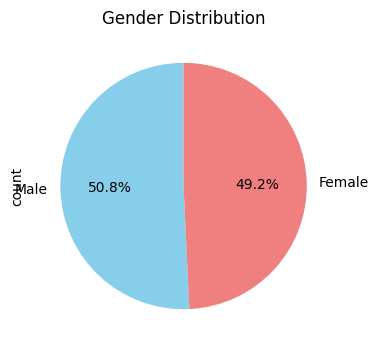

In [15]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df_customer['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")


C:\Users\dhars\AppData\Local\Temp\ipykernel_2824\3143533239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_customer, palette='pastel')


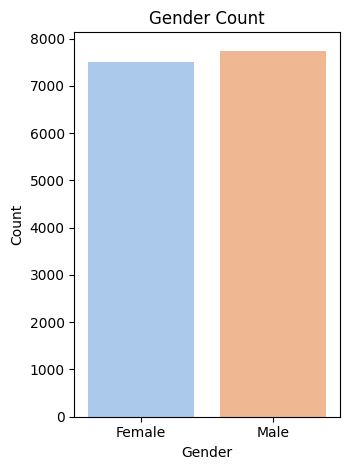

In [16]:
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', data=df_customer, palette='pastel')
plt.title("Gender Count")autopct='%1.1f%%',
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\dhars\AppData\Local\Temp\ipykernel_2824\3930906332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


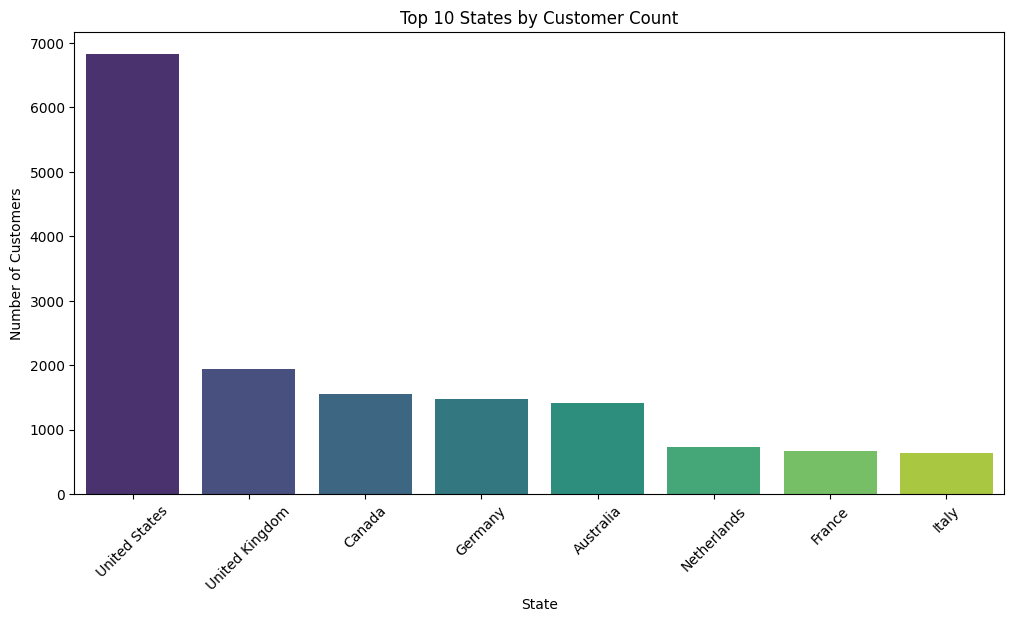

In [19]:
# Top 10 states by number of customers
plt.figure(figsize=(12, 6))
top_states = df_customer['Country'].value_counts() 
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Country by Customer Count")
plt.ylabel("Number of Customers")
plt.xlabel("State")
plt.show()


# Save Cleaned Data

In [15]:
df_customer.to_csv('df_customer.csv', index=False)

# Products Dataset

In [29]:
import pandas as pd

In [30]:
df_products =pd.read_csv('Products.csv')
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [31]:
df_products.info() # Get information about the datafram


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


# Check Null

In [32]:
print(df_products.isnull().sum())

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


In [33]:
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
     

In [24]:
df_products['Unit Price USD'] 

0        12.99
1        12.99
2        14.52
3        21.57
4        21.57
         ...  
2512    129.99
2513    129.99
2514      3.35
2515      3.35
2516      3.35
Name: Unit Price USD, Length: 2517, dtype: float64

# Remove Duplicates

In [34]:

# Remove Duplicates
# Check for duplicate rows and remove them if necessary
df_products.duplicated().sum()
     

0

In [25]:

df_products.drop(["SubcategoryKey"],axis=1,inplace=True)


# Save Cleaned Data

In [31]:
df_products.to_csv('df_products.csv', index=False)

# Visualization

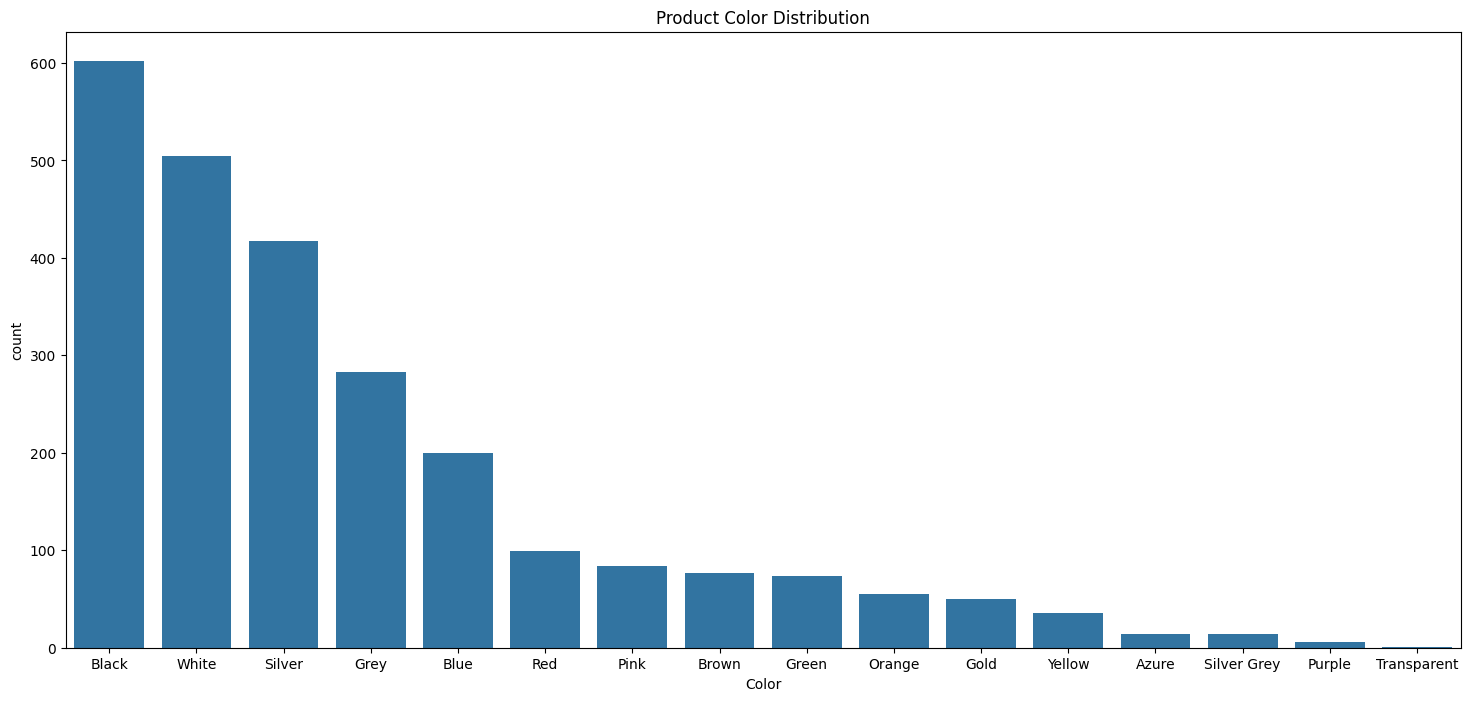

In [32]:
plt.figure(figsize=(18, 8))
sns.countplot(x='Color', data=df_products, order=df_products['Color'].value_counts().index)
plt.title("Product Color Distribution")
plt.show()


Text(0.5, 1.0, 'counts as per Brand')

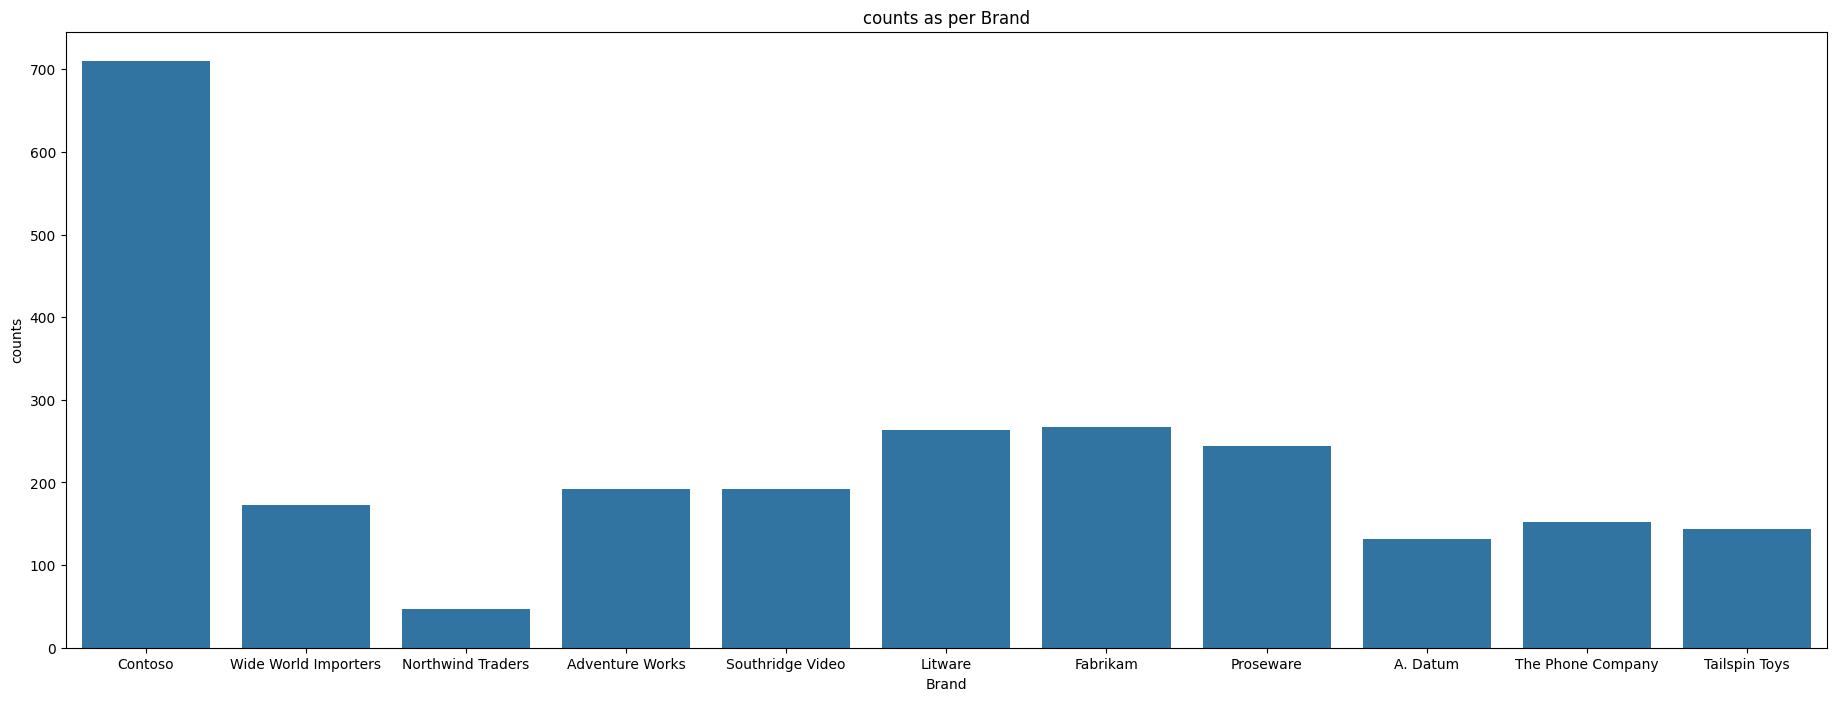

In [36]:
#visualize the brand and category
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=df_products["Brand"])
plt.xlabel("Brand")
plt.ylabel("counts")
plt.title("counts as per Brand")


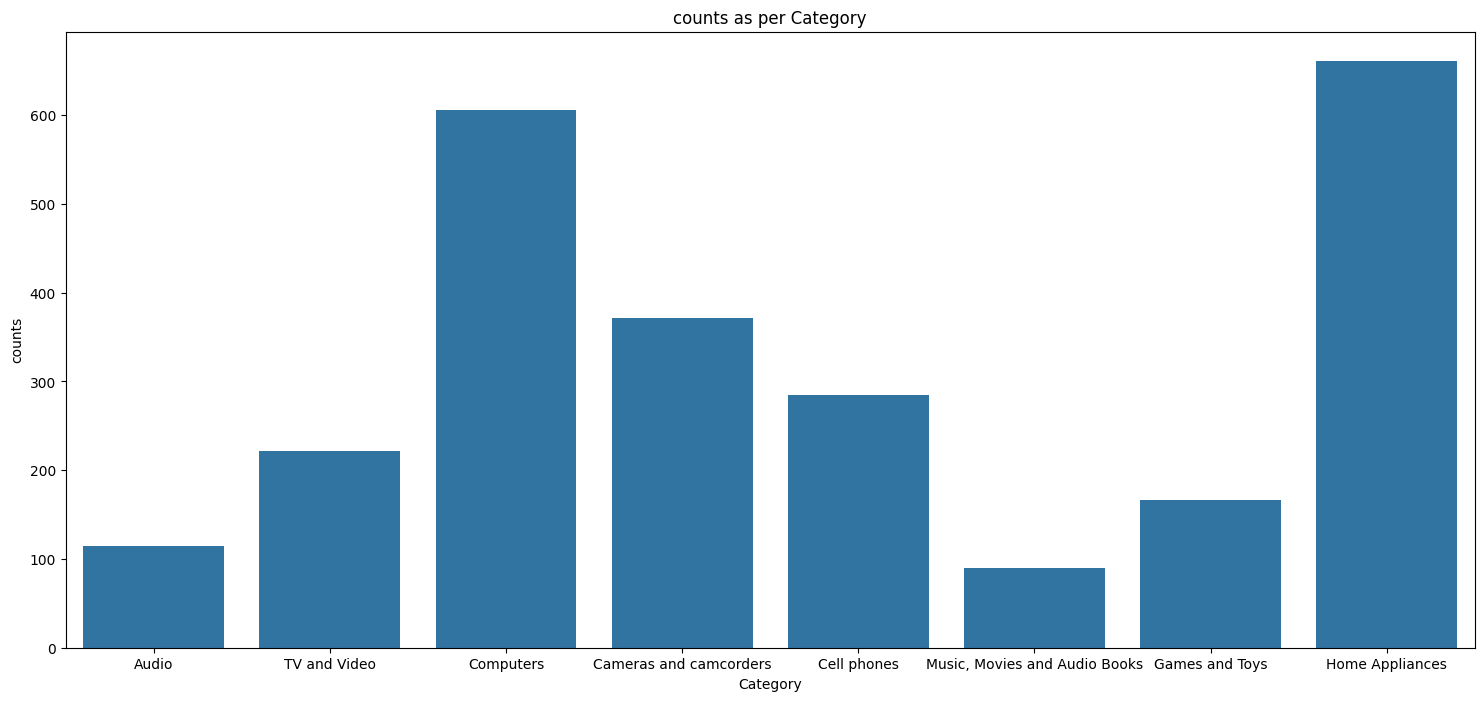

In [37]:
plt.show()
plt.figure(figsize=(40,8))
plt.subplot(1,2,2)
sns.countplot(x=df_products["Category"])
plt.xlabel("Category")
plt.ylabel("counts")
plt.title("counts as per Category")
plt.show()

In [44]:
df_products= pd.read_csv('Products.csv')
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [46]:
 
 df_products.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [45]:
df_products.describe() 

,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


# Check Null

In [47]:

 
print(df_products.isnull().sum())

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64


In [48]:
# Data Type Conversion
# Convert columns to the appropriate data types if needed
# Example: Convert 'Unit Cost USD' and 'Unit Price USD' to numeric type
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
     

In [50]:
# Remove Duplicates
# Check for duplicate rows and remove them if necessary
df_products.drop_duplicates(inplace=True)

In [ ]:

df_products.drop(["SubcategoryKey"],axis=1,inplace=True)

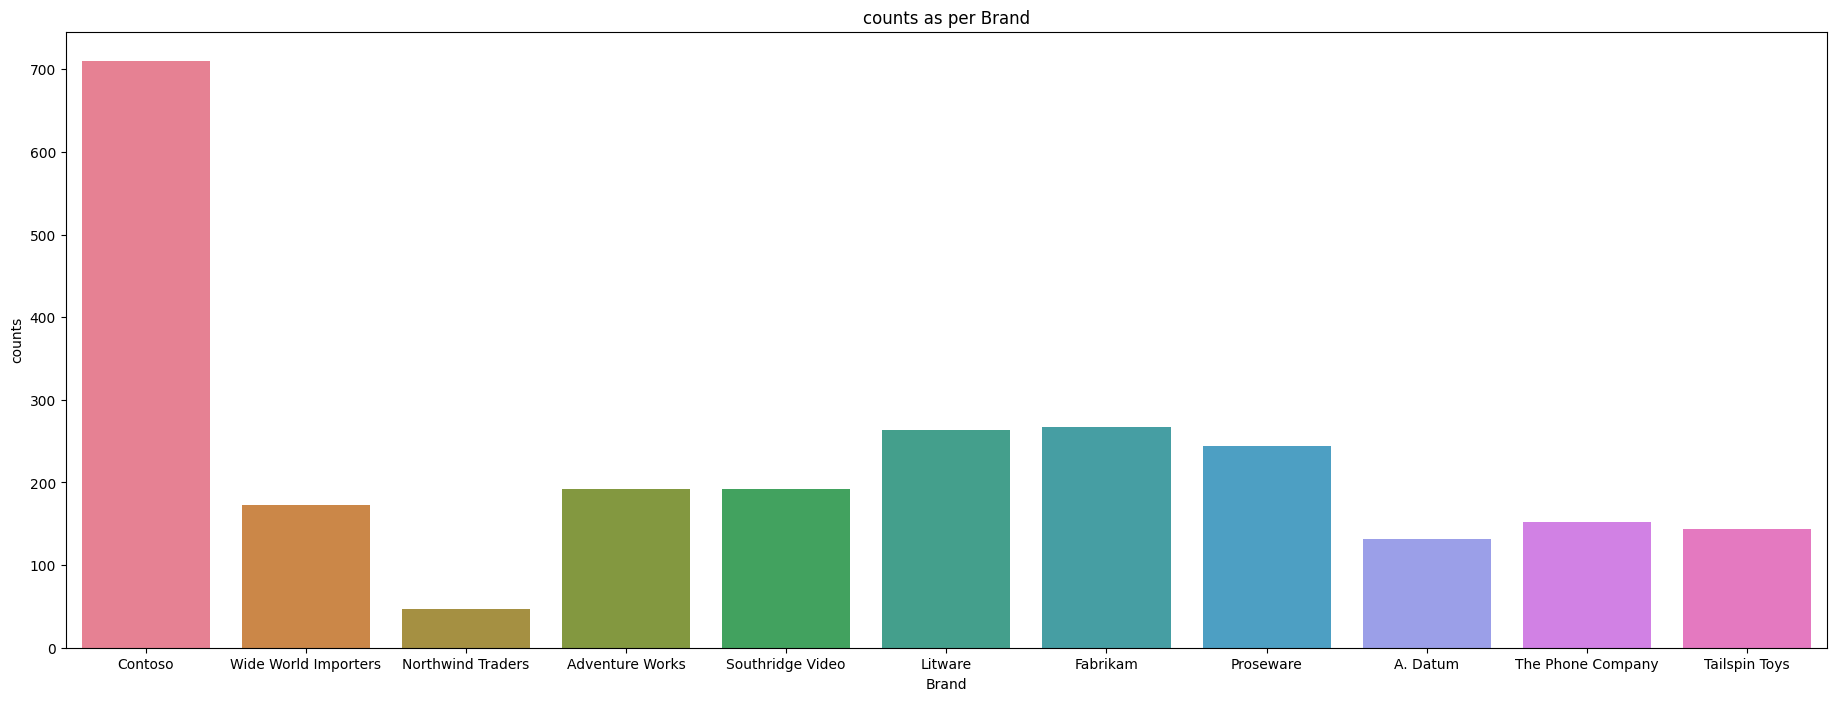

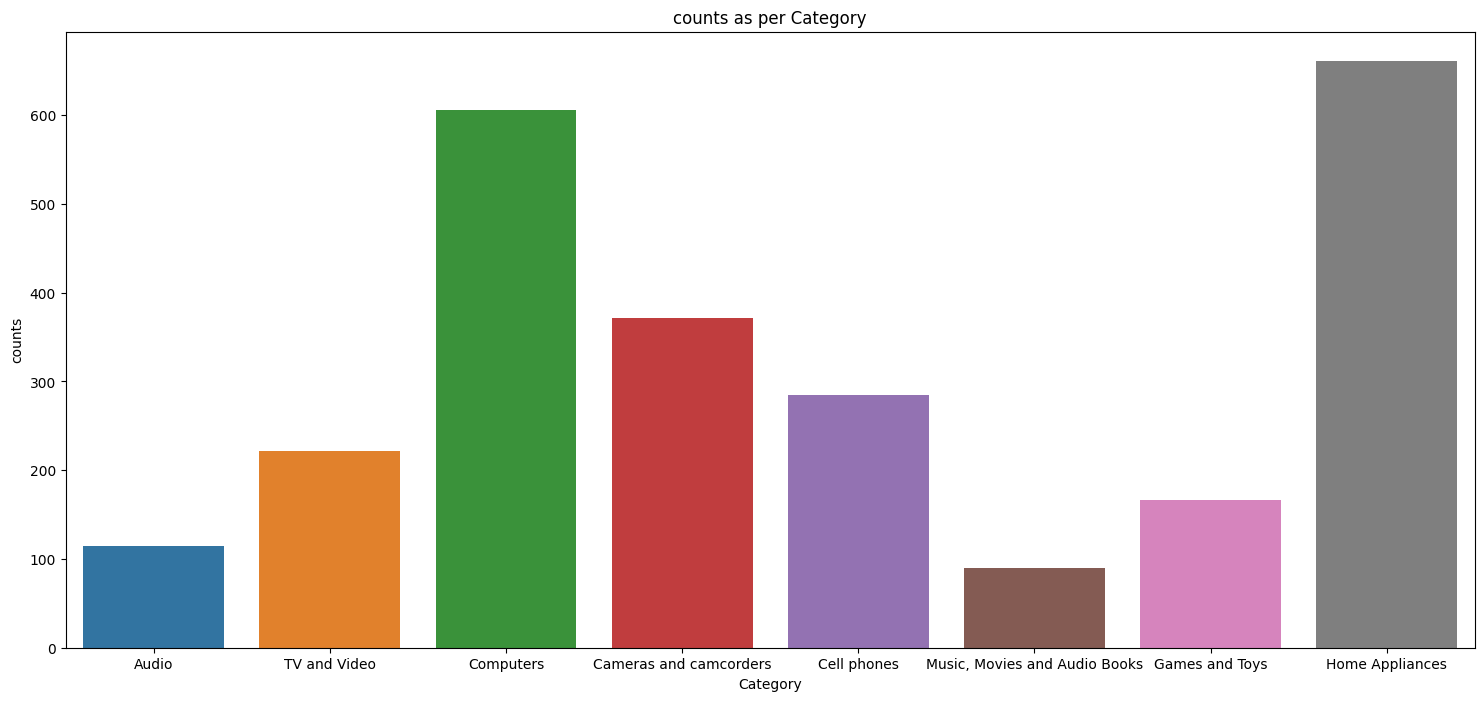

In [42]:

#visualize the brand and category
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=df_products["Brand"],data=df_products,hue="Brand")
plt.xlabel("Brand")
plt.ylabel("counts")
plt.title("counts as per Brand")
plt.show()
plt.figure(figsize=(40,8))
plt.subplot(1,2,2)
sns.countplot(x=df_products["Category"],data=df_products,hue="Category")
plt.xlabel("Category")
plt.ylabel("counts")
plt.title("counts as per Category")
plt.show()

# Sales Dataset

In [87]:
df_sales = pd.read_csv('Sales.csv')

In [88]:
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


# Null Check

In [89]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [90]:
 df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

# Drop column

In [99]:
df_sales.drop('Delivery Date', axis = 1,inplace = True)

In [100]:
df_sales

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1269051,0,2007,1,USD
3,366002,1,2016-01-01,266019,0,1106,7,CAD
4,366002,2,2016-01-01,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD


In [101]:

df_sales.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [102]:
df_sales.duplicated().sum()


0

In [103]:
df_sales["Order Date"] = pd.to_datetime(df_sales['Order Date'])

In [104]:
df_sales

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1269051,0,2007,1,USD
3,366002,1,2016-01-01,266019,0,1106,7,CAD
4,366002,2,2016-01-01,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD


In [105]:
df_sales


,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1269051,0,2007,1,USD
3,366002,1,2016-01-01,266019,0,1106,7,CAD
4,366002,2,2016-01-01,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD


In [64]:
df_sales.to_csv('df_sales.csv', index=False)

In [65]:
df_sales

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,YearMonth,Month
0,366000,1,2016-01-01,265598,10,1304,1,CAD,2016-01,2016-01
1,366001,1,2016-01-01,1269051,0,1048,2,USD,2016-01,2016-01
2,366001,2,2016-01-01,1269051,0,2007,1,USD,2016-01,2016-01
3,366002,1,2016-01-01,266019,0,1106,7,CAD,2016-01,2016-01
4,366002,2,2016-01-01,266019,0,373,1,CAD,2016-01,2016-01
...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,2021-02,2021-02
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,2021-02,2021-02
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,2021-02,2021-02
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,2021-02,2021-02


# Visualization

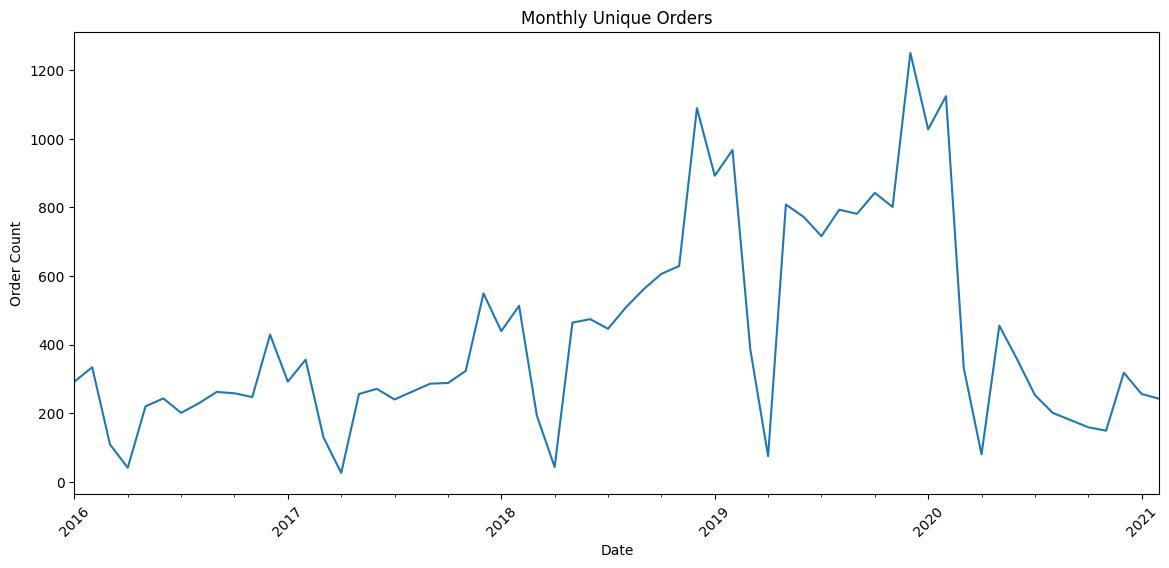

In [63]:
# Orders per month
df_sales['Month'] = df_sales['Order Date'].dt.to_period('M')
order_month = df_sales.groupby('YearMonth')['Order Number'].nunique()

plt.figure(figsize=(14, 6))
order_month.plot()
plt.title("Monthly Unique Orders")
plt.ylabel("Order Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()


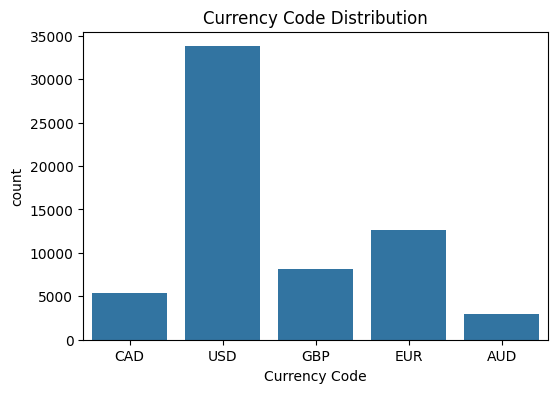

In [65]:
#Currency Distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='Currency Code', data=df_sales)
plt.title("Currency Code Distribution")
plt.show()


In [113]:
df_sales['Order Number'].nunique()

26326

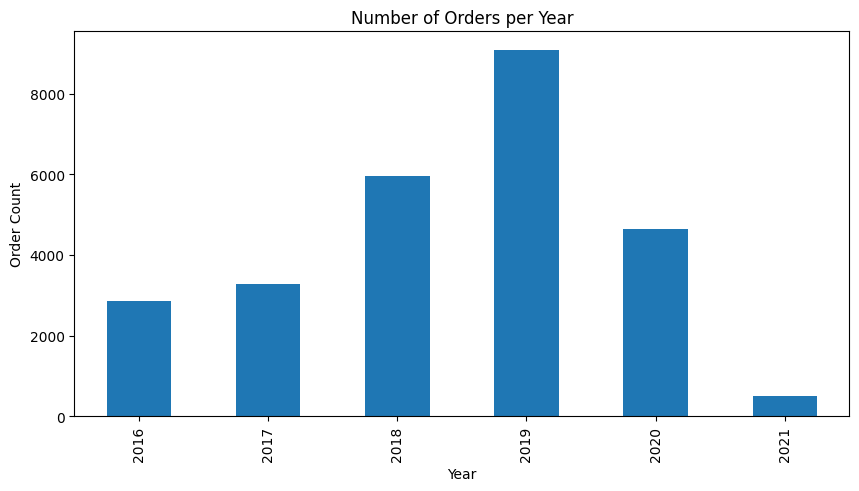

In [111]:
df_sales['Year'] = df_sales['Order Date'].dt.year
yearly_orders = df_sales.groupby('Year')['Order Number'].nunique()

plt.figure(figsize=(10, 5))
yearly_orders.plot(kind='bar')
plt.title("Number of Orders per Year")
plt.ylabel("Order Count")
plt.show()


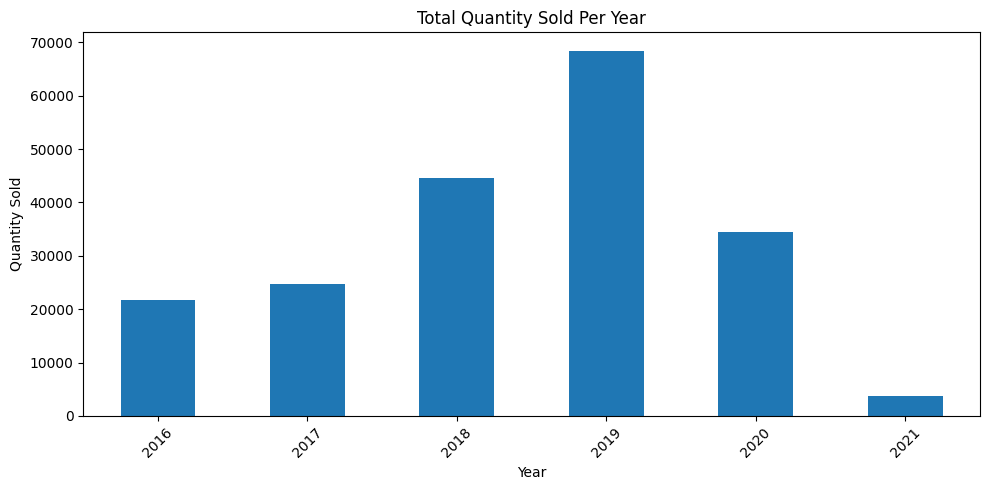

In [115]:
# First, extract the year from Order Date
df_sales['Year'] = df_sales['Order Date'].dt.year

# Group by year and sum the Quantity
yearly_quantity = df_sales.groupby('Year')['Quantity'].sum()

# Plot the total quantity sold per year
plt.figure(figsize=(10, 5))
yearly_quantity.plot(kind='bar')
plt.title("Total Quantity Sold Per Year")
plt.xlabel("Year")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


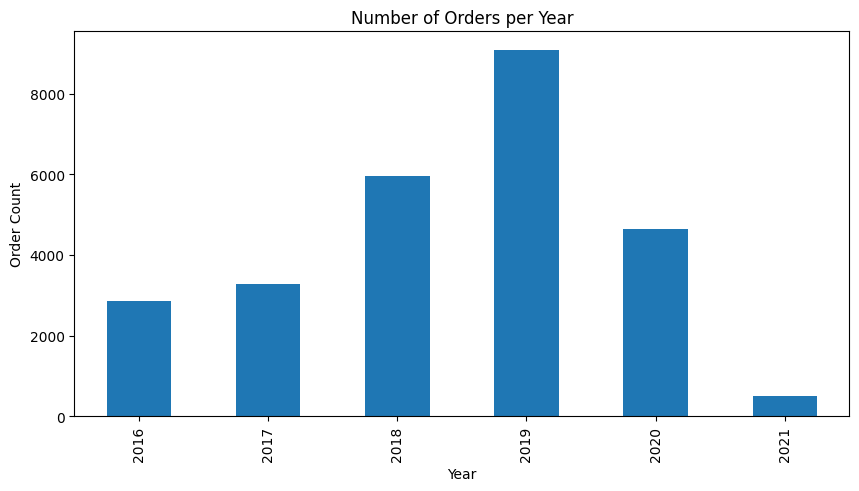

In [78]:
#📈 Orders per Year
 

df_sales['Year'] = df_sales['Order Date'].dt.year
yearly_orders = df_sales.groupby('Year')['Order Number'].nunique()

plt.figure(figsize=(10, 5))
yearly_orders.plot(kind='bar')
plt.title("Number of Orders per Year")
plt.ylabel("Order Count")
plt.show()


# Stores Dataset

In [4]:
df_stores=  pd.read_csv('Stores.csv')
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.00000,1/1/2008
1,2,Australia,Northern Territory,665.00000,1/12/2008
2,3,Australia,South Australia,2000.00000,1/7/2012
3,4,Australia,Tasmania,2000.00000,1/1/2010
4,5,Australia,Victoria,2000.00000,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.00000,3/6/2008
63,64,United States,Washington DC,1330.00000,1/1/2010
64,65,United States,West Virginia,1785.00000,1/1/2012
65,66,United States,Wyoming,840.00000,1/1/2014


In [3]:
import pandas as pd

In [5]:

# Display basic information about the dataframe
print(df_stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  67 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB
None


# Check Null

In [6]:
print(df_stores.isnull().sum())

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64


In [7]:
# Data Cleaning
# Convert 'Open Date' to datetime objects
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'])

# Drop Duplicates

In [8]:

# Remove duplicate rows (if any)
df_stores.drop_duplicates(inplace=True)

In [9]:
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.00000,2008-01-01
1,2,Australia,Northern Territory,665.00000,2008-01-12
2,3,Australia,South Australia,2000.00000,2012-01-07
3,4,Australia,Tasmania,2000.00000,2010-01-01
4,5,Australia,Victoria,2000.00000,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.00000,2008-03-06
63,64,United States,Washington DC,1330.00000,2010-01-01
64,65,United States,West Virginia,1785.00000,2012-01-01
65,66,United States,Wyoming,840.00000,2014-01-01


In [85]:
df_stores.to_csv('df_stores.csv', index=False)

# Visualization

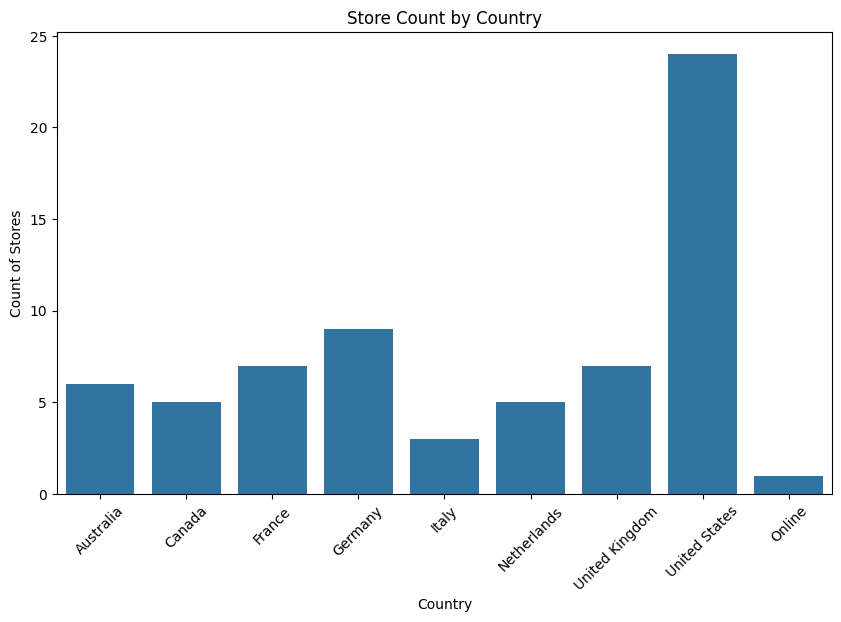

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', data=df_stores)
plt.title('Store Count by Country')
plt.xlabel('Country')
plt.ylabel('Count of Stores')
plt.xticks(rotation=45)
plt.show()


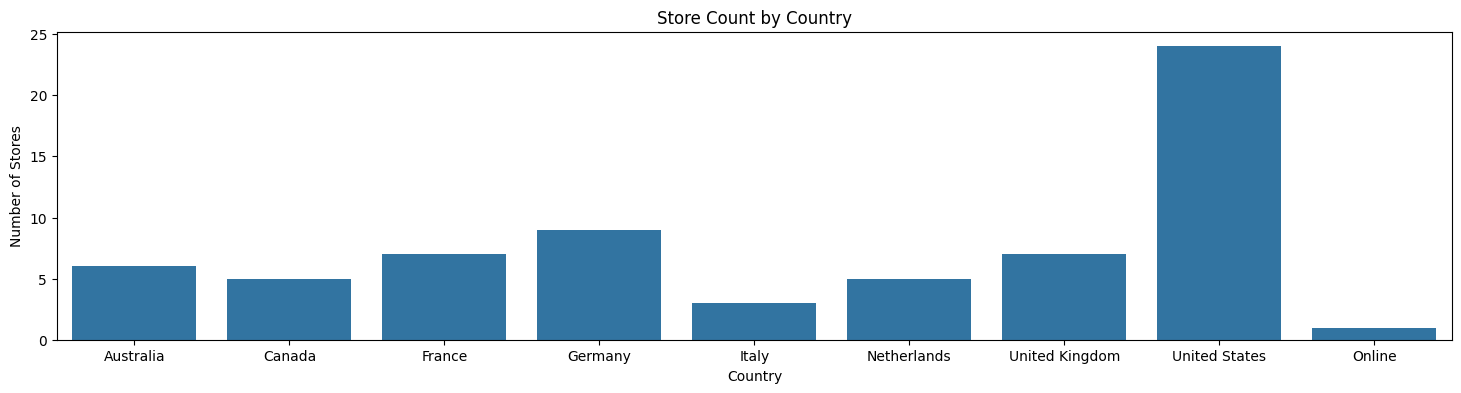

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(18, 4))
sns.countplot(x='Country', data=df_stores)
plt.title("Store Count by Country")
plt.xlabel("Country")
plt.ylabel("Number of Stores")
plt.show()


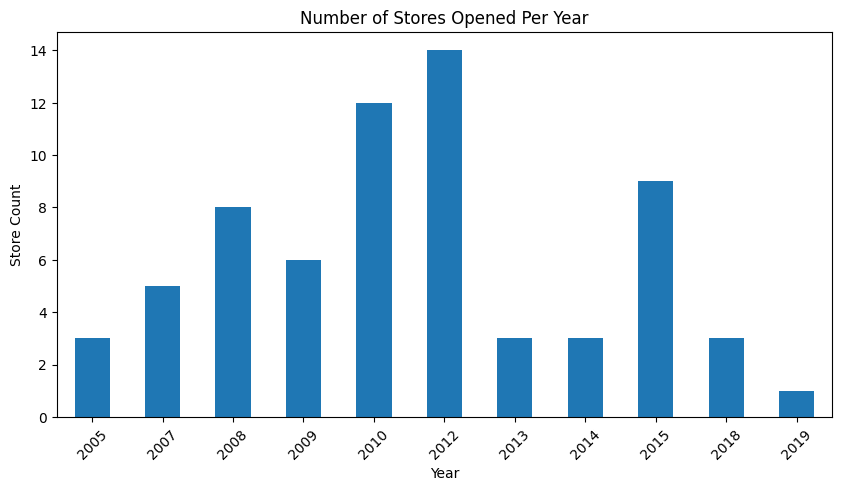

In [17]:
#Store Openings Over Time

df_stores['Open Date'] = df_stores['Open Date'].dt.year
store_openings = df_stores['Open Date'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
store_openings.plot(kind='bar')
plt.title("Number of Stores Opened Per Year")
plt.ylabel("Store Count")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()


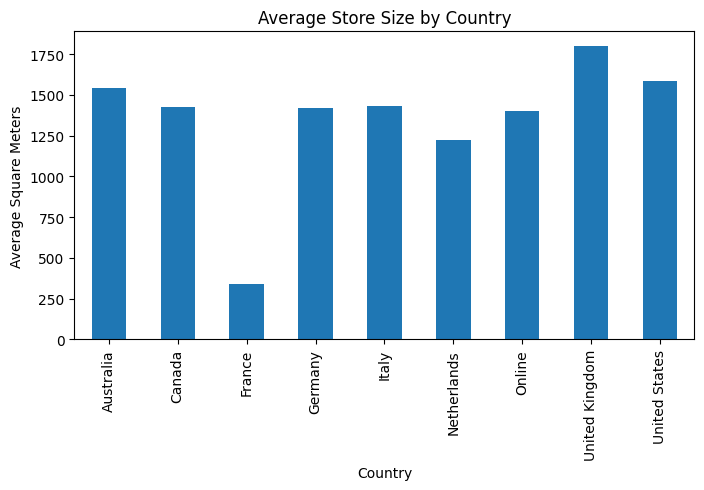

In [18]:
#Average Store Size by Country

avg_size_country = df_stores.groupby('Country')['Square Meters'].mean()

plt.figure(figsize=(8, 4))
avg_size_country.plot(kind='bar')
plt.title("Average Store Size by Country")
plt.ylabel("Average Square Meters")
plt.show()


# Exchange Dataset

In [19]:
df_exchange=pd.read_csv('Exchange_Rates.csv')

# Check Null

In [20]:
# Check for missing values
print(df_exchange.isnull().sum())
 
# Summary statistics
print(df_exchange.describe())

# Check data types
print(df_exchange.dtypes)

Date        0
Currency    0
Exchange    0
dtype: int64
           Exchange
count  11215.000000
mean       1.061682
std        0.245519
min        0.628500
25%        0.857800
50%        1.000000
75%        1.311900
max        1.725300
Date         object
Currency     object
Exchange    float64
dtype: object


In [21]:
df_exchange

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [22]:
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'])

In [ ]:
df_exchange.to_csv('df_exchange.csv', index=False)

# Visualization

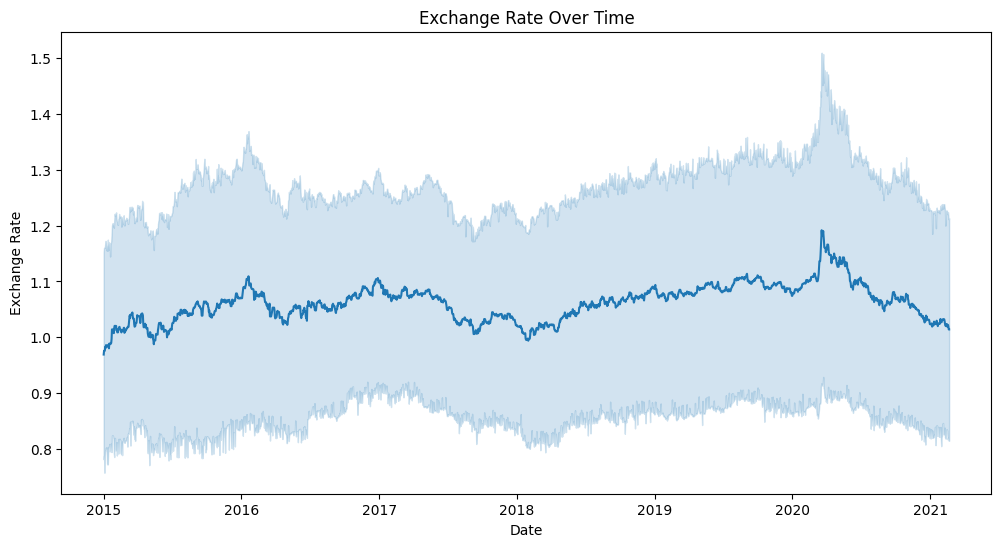

In [61]:

# Analyze the 'Exchange' rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Exchange', data=df_exchange)
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

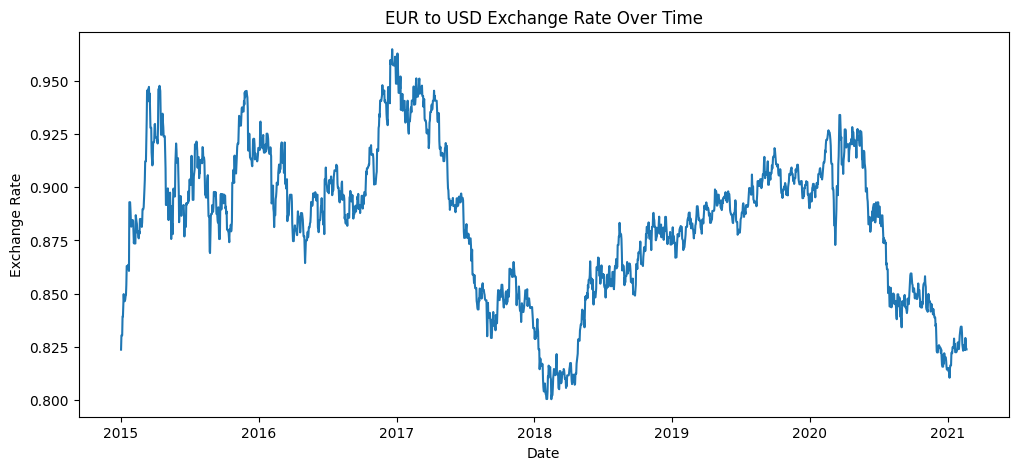

In [98]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_exchange[df_exchange['Currency'] == 'EUR'], x='Date', y='Exchange')
plt.title("EUR to USD Exchange Rate Over Time")
plt.ylabel("Exchange Rate")
plt.xlabel("Date")
plt.show()


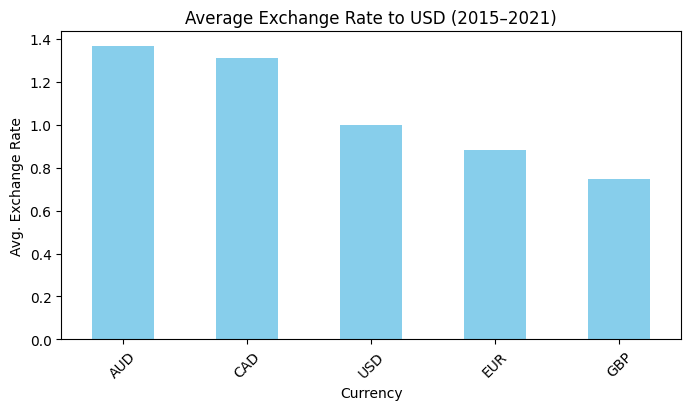

In [99]:
avg_rates = df_exchange.groupby('Currency')['Exchange'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
avg_rates.plot(kind='bar', color='skyblue')
plt.title("Average Exchange Rate to USD (2015–2021)")
plt.ylabel("Avg. Exchange Rate")
plt.xticks(rotation=45)
plt.show()
